In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from scipy.special import boxcox1p 
import scipy

In [11]:
df = pd.read_csv('insurance.csv')
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

### Первичный анализ

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [7]:
df['region'].nunique()

4

In [12]:
# С категориальных в числовую 
mapping = {'yes':1, 'no':0}
df['smoker'] = df['smoker'].map(mapping)

In [13]:
mappings = {'male':1, 'female':0}
df['sex'] = df['sex'].map(mappings)

In [14]:
df.head()

age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520

### Разобрались с данными, поняли что нет пропущенных значений, теперь посмотрим на распределение

<Axes: xlabel='charges', ylabel='Density'>

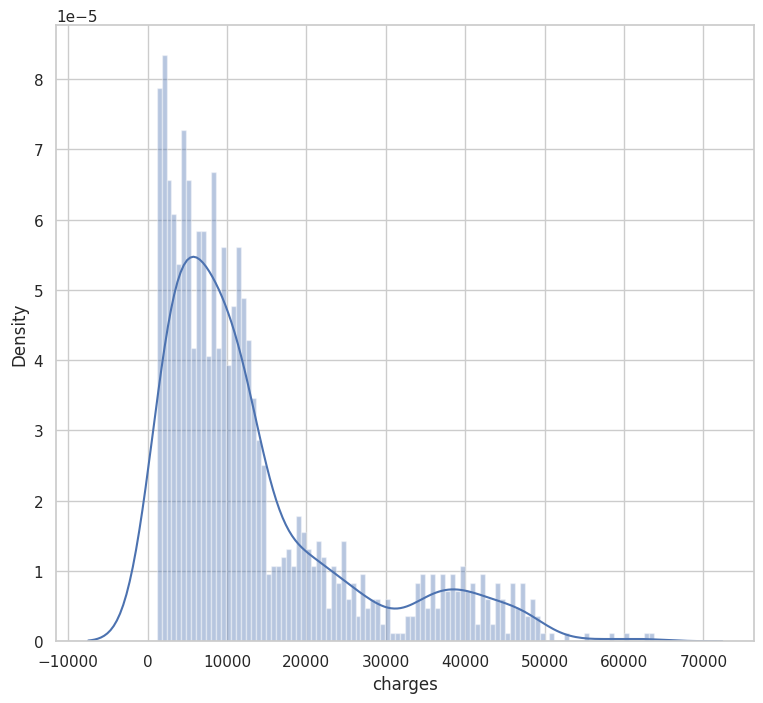

In [11]:
plt.figure(figsize = (9, 8))
sns.distplot(df['charges'], bins=100, hist_kws = {'alpha':0.4}, kde= True)

### Как видно на гистограммах, распределение исходной переменной charges сильно скошено влево (асимметрия). Такое распределение может негативно повлиять на качество регрессионных моделей, особенно линейных, но в финальном результате я отказался от этой идеи, тк результаты не удовлетворительны

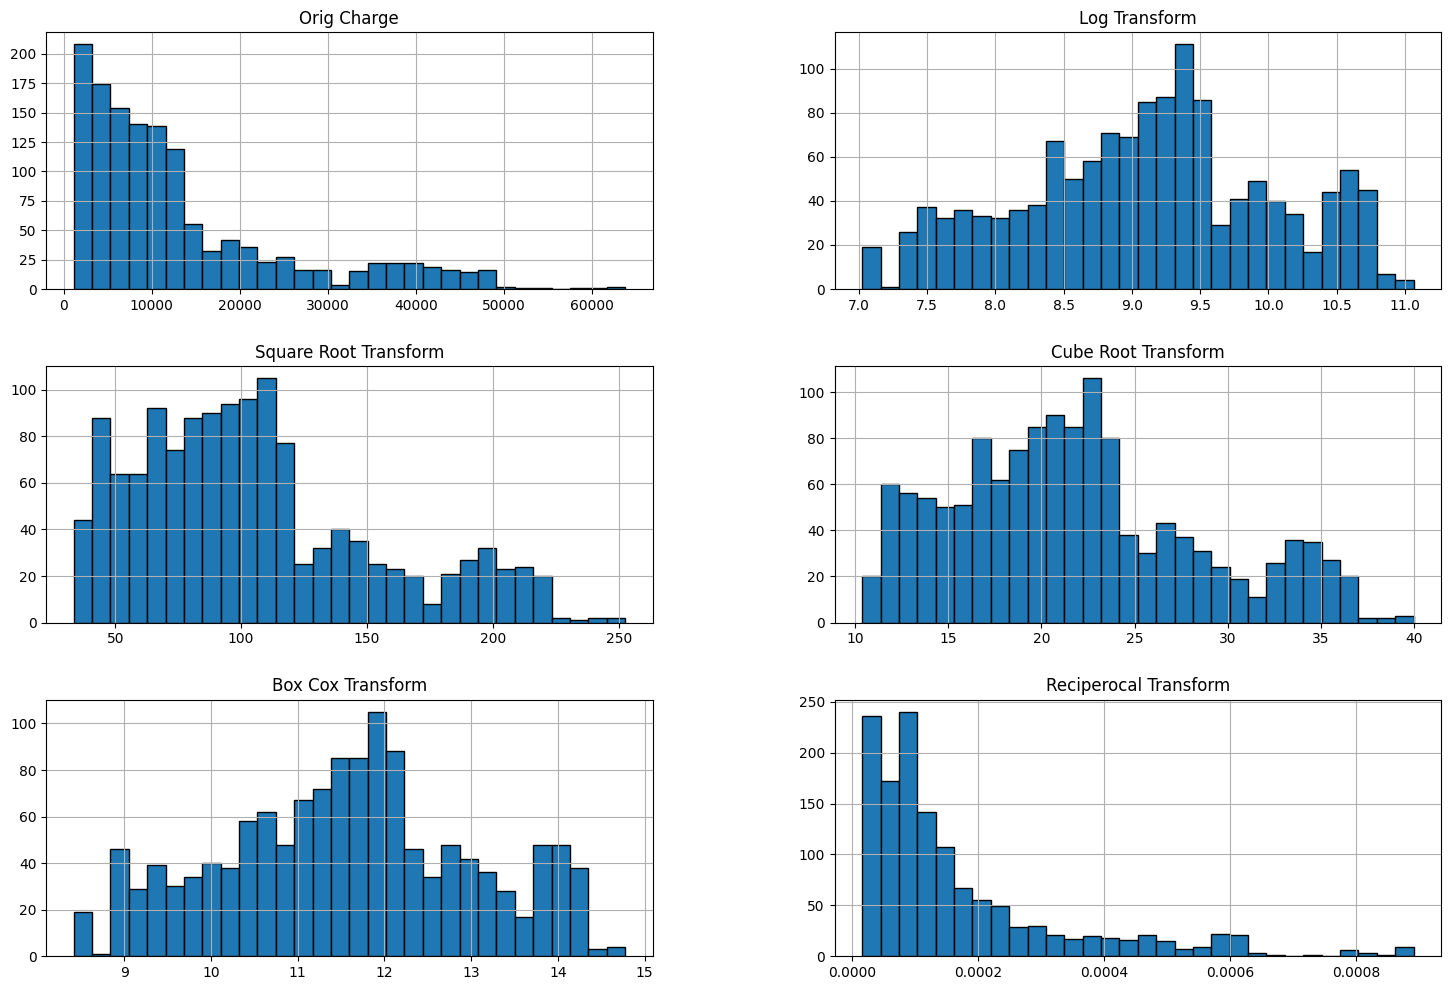

In [16]:
plt.rcParams['figure.figsize'] = (18, 12)

charges = pd.DataFrame({
    "Orig Charge": df['charges'],
    "Log Transform": np.log1p(df['charges']),
    "Square Root Transform": np.sqrt(df['charges']),
    "Cube Root Transform": np.cbrt(df['charges']),
    "Box Cox Transform": boxcox1p(df['charges'], 0.05),


    "Reciperocal Transform": 1 / (df['charges'] + 1)
})

charges.hist(bins=30, edgecolor='black')
plt.show()
    

### Преобразования log1p и boxcox хорошо справились с задачей, они значительно уменьшили асимметрию и сделали распределение целевой переменной ближе к нормальному

<Axes: >

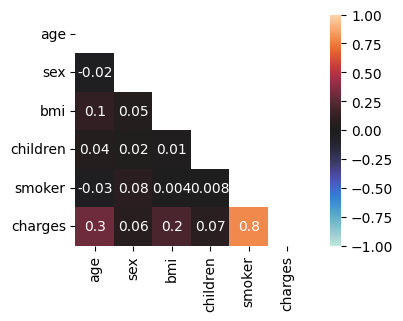

In [15]:
numeric_columns = df.select_dtypes(include=['number'])
matrix = np.triu(numeric_columns.corr())
corrmat = numeric_columns.corr()
f, ax = plt.subplots(figsize=(6, 3))
sns.heatmap(corrmat, vmin=-1, vmax=1, center=0, square=True, annot=True, fmt='.1g', mask=matrix)

### На тепловой карте видно, что признак smoker оказывает наибольшее влияние на charges, с коэффициентом корреляции около 0.8. Это означает, что курящие в среднем платят значительно больше за страховку

### Умеренная корреляция: 
#### --Чем старше человек, тем выше его страховые взносы. Это отражает рост вероятности медицинских расходов с возрастом
#### --Избыточный вес может быть связан с риском хронических заболеваний, таких как диабет и гипертония

### sex, children, region:
####  --Корреляции с целевой переменной незначительные (в пределах ±0.1), что говорит о том, что они оказывают слабое или косвенное влияние на итоговую стоимость страховки

### Сравнение моделей (оценка по кросс-валидации)

### Random Forest

###  XGBoost

### LGBMRegressor

### Gradient Boosting

In [23]:
!pipreqs ./ --force


INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in ./requirements.txt
